# CSC 578 NN&DL Spring, 2022
## HW7: Image Classification using a CNN



This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.

### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!

2.7.0


In [2]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

### Download and prepare the CIFAR10 dataset¶

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [3]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


In [5]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [6]:
train_labels

array([[3],
       [1],
       [6],
       ...,
       [8],
       [5],
       [0]], dtype=uint8)

In [7]:
valid_labels

array([[6],
       [2],
       [6],
       ...,
       [5],
       [3],
       [2]], dtype=uint8)

### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

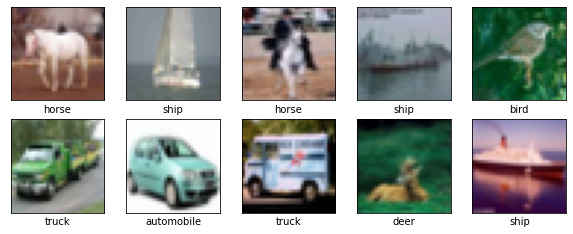

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

Verify the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

### Train the model

In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5804 - accuracy: 0.4235 - val_loss: 1.2879 - val_accuracy: 0.5392
Epoch 2/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2063 - accuracy: 0.5699 - val_loss: 1.0945 - val_accuracy: 0.6104
Epoch 3/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.0447 - accuracy: 0.6318 - val_loss: 0.9843 - val_accuracy: 0.6605
Epoch 4/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9386 - accuracy: 0.6703 - val_loss: 0.9915 - val_accuracy: 0.6519
Epoch 5/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.8623 - accuracy: 0.6992 - val_loss: 0.9191 - val_accuracy: 0.6840
Epoch 6/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.7957 - accuracy: 0.7181 - val_loss: 0.8862 - val_accuracy: 0.6979
Epoch 7/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.7396 - accuracy: 0.7401 - val_loss: 0.8966 -

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 1s - loss: 0.8783 - accuracy: 0.7086 - 822ms/epoch - 3ms/step
valid_accuracy=0.7085999846458435, valid_loss=0.8783203363418579


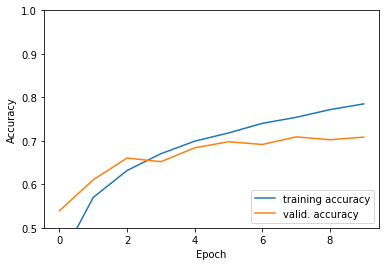

In [13]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

In [14]:
import pandas as pd

In [15]:
def predition(model, test_images):
    #save the prediction
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    
    #create a dataFrame to save result
    df = pd.DataFrame(predictions, columns = ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9'])
    #add index on the result
    id = []
    for i in range(len(df)):
        id.append(i+1)    
    df.insert(loc=0, column = 'id',value = id)
    
    #save to csv file
    df.to_csv('prediction.csv', index = False)
    
    return df.head()

In [16]:
#predition(model, test_images)

## Grid Search

#### trying to find the best optizimer for the model

In [17]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings('ignore')

In [18]:
def get_model(optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])
    return model

In [19]:
#create model
model = KerasClassifier(build_fn=get_model, epochs=10, batch_size=10, verbose=0)
#define the optimizers
grid = GridSearchCV(estimator=model, param_grid={'optimizer': ['Adam','Adamax','Adagrad','Adadelta','SGD','RMSprop']}, n_jobs=-1, cv=3)
grid.fit(train_images, train_labels)

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa3c4cf6190>,
             n_jobs=-1,
             param_grid={'optimizer': ['Adam', 'Adamax', 'Adagrad', 'Adadelta',
                                       'SGD', 'RMSprop']})

In [20]:
#print result
grid.best_params_

{'optimizer': 'Adamax'}

In [21]:
grid.best_score_

0.6714004079500834

#### Even though, after we used GridSearch, when 'optimizer': 'Adamax' the model performs the best with 67% accuracy; however, the model with 'Adam' performs better with about 70% accuracy. Therefore, we will still chose 'Adam' as the optimizer.

## Change the size of filters (e.g. 5 * 5, 7 * 7).

#### try filters with 5 * 5 first

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

In [23]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6035 - accuracy: 0.4134 - val_loss: 1.3896 - val_accuracy: 0.5037
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.2834 - accuracy: 0.5389 - val_loss: 1.2176 - val_accuracy: 0.5563
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1428 - accuracy: 0.5941 - val_loss: 1.1609 - val_accuracy: 0.5973
Epoch 4/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0428 - accuracy: 0.6321 - val_loss: 1.0655 - val_accuracy: 0.6345
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9713 - accuracy: 0.6586 - val_loss: 1.0076 - val_accuracy: 0.6496
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9076 - accuracy: 0.6799 - val_loss: 1.0213 - val_accuracy: 0.6475
Epoch 7/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8518 - accuracy: 0.7005 - val_loss: 0.9802 -

#### the 5 * 5 filters size didn't perferm well, so we will try 3x3 and 1x1 convolutions filter size.

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

In [26]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5236 - accuracy: 0.4509 - val_loss: 1.2520 - val_accuracy: 0.5509
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1760 - accuracy: 0.5840 - val_loss: 1.1663 - val_accuracy: 0.5854
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0384 - accuracy: 0.6327 - val_loss: 1.1184 - val_accuracy: 0.6138
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9526 - accuracy: 0.6654 - val_loss: 1.0463 - val_accuracy: 0.6333
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8885 - accuracy: 0.6870 - val_loss: 0.9604 - val_accuracy: 0.6607
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8217 - accuracy: 0.7081 - val_loss: 0.9722 - val_accuracy: 0.6730
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7689 - accuracy: 0.7293 - val_loss: 0.9600 - val_ac

#### it only improve a lot bit, but still didnt reach the original model's accuracy. Lets try the 7x7 and 1x1 sizes.

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

In [29]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.6512 - accuracy: 0.3993 - val_loss: 1.4286 - val_accuracy: 0.4827
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.3522 - accuracy: 0.5167 - val_loss: 1.2976 - val_accuracy: 0.5432
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.2304 - accuracy: 0.5626 - val_loss: 1.2045 - val_accuracy: 0.5695
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1386 - accuracy: 0.5966 - val_loss: 1.1965 - val_accuracy: 0.5737
Epoch 5/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0578 - accuracy: 0.6272 - val_loss: 1.1312 - val_accuracy: 0.6114
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9895 - accuracy: 0.6529 - val_loss: 1.1216 - val_accuracy: 0.6101
Epoch 7/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9327 - accuracy: 0.6736 - val_loss: 1.0638 -

#### After change the size of filters to 5*5 and 7*7, we will still chose 3*3 for further model. 

## change the epoch

#### Lets try different epoch numbers to find the best one.

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

In [32]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [33]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6513 - accuracy: 0.3958 - val_loss: 1.4192 - val_accuracy: 0.4854
Epoch 2/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.3131 - accuracy: 0.5293 - val_loss: 1.3076 - val_accuracy: 0.5392
Epoch 3/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1698 - accuracy: 0.5819 - val_loss: 1.1447 - val_accuracy: 0.6012
Epoch 4/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0673 - accuracy: 0.6214 - val_loss: 1.0664 - val_accuracy: 0.6250
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9972 - accuracy: 0.6478 - val_loss: 1.0866 - val_accuracy: 0.6297
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9394 - accuracy: 0.6687 - val_loss: 1.0372 - val_accuracy: 0.6443
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8936 - accuracy: 0.6851 - val_loss: 0.9693 -

In [34]:
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5247 - accuracy: 0.8136 - val_loss: 1.1430 - val_accuracy: 0.6678
Epoch 2/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5002 - accuracy: 0.8216 - val_loss: 1.2052 - val_accuracy: 0.6648
Epoch 3/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4861 - accuracy: 0.8267 - val_loss: 1.1694 - val_accuracy: 0.6683
Epoch 4/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4650 - accuracy: 0.8336 - val_loss: 1.1778 - val_accuracy: 0.6686
Epoch 5/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4522 - accuracy: 0.8380 - val_loss: 1.2806 - val_accuracy: 0.6626
Epoch 6/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4358 - accuracy: 0.8439 - val_loss: 1.2298 - val_accuracy: 0.6661
Epoch 7/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.4150 - accuracy: 0.8487 - val_loss: 1.3285 -

313/313 - 1s - loss: 2.2867 - accuracy: 0.6427 - 1s/epoch - 3ms/step
valid_accuracy=0.6427000164985657, valid_loss=2.2867181301116943


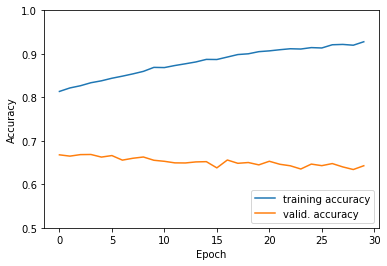

In [35]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### with the epochs increasing, the accuracy for training model is about 0.9, but for validation dataset, the accuracy is still around 0.68. Therefore, there is an overfitting problem.

## Add more Convolution layers

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [37]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 91s 73ms/step - loss: 1.6717 - accuracy: 0.3807 - val_loss: 1.2624 - val_accuracy: 0.5426
Epoch 2/10
1250/1250 [==============================] - 92s 73ms/step - loss: 1.1491 - accuracy: 0.5849 - val_loss: 1.0065 - val_accuracy: 0.6465
Epoch 3/10
1250/1250 [==============================] - 92s 74ms/step - loss: 0.9215 - accuracy: 0.6727 - val_loss: 0.8548 - val_accuracy: 0.7001
Epoch 4/10
1250/1250 [==============================] - 92s 74ms/step - loss: 0.7718 - accuracy: 0.7290 - val_loss: 0.8013 - val_accuracy: 0.7206
Epoch 5/10
1250/1250 [==============================] - 92s 74ms/step - loss: 0.6628 - accuracy: 0.7663 - val_loss: 0.7659 - val_accuracy: 0.7403
Epoch 6/10
1250/1250 [==============================] - 92s 73ms/step - loss: 0.5723 - accuracy: 0.7997 - val_loss: 0.8350 - val_accuracy: 0.7256
Epoch 7/10
1250/1250 [==============================] - 92s 74ms/step - loss: 0.4936 - accuracy: 0.8257 - val_loss: 0.8186 -

313/313 - 4s - loss: 0.9194 - accuracy: 0.7441 - 4s/epoch - 13ms/step
valid_accuracy=0.7440999746322632, valid_loss=0.9194271564483643


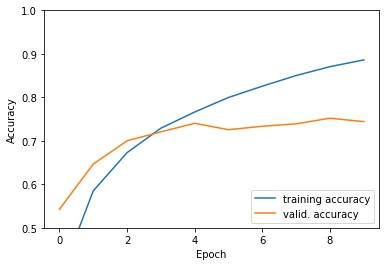

In [39]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### After added more convolution layers, it appears there is an overfitting proble, therefore, we will add dropout layer to the model.

## add DropOut Layer

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [41]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [42]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 95s 76ms/step - loss: 1.6315 - accuracy: 0.3962 - val_loss: 1.2946 - val_accuracy: 0.5496
Epoch 2/10
1250/1250 [==============================] - 94s 75ms/step - loss: 1.1847 - accuracy: 0.5779 - val_loss: 1.1479 - val_accuracy: 0.5968
Epoch 3/10
1250/1250 [==============================] - 94s 76ms/step - loss: 1.0174 - accuracy: 0.6380 - val_loss: 0.9488 - val_accuracy: 0.6636
Epoch 4/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.8946 - accuracy: 0.6847 - val_loss: 0.8534 - val_accuracy: 0.7037
Epoch 5/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.8110 - accuracy: 0.7143 - val_loss: 0.7690 - val_accuracy: 0.7373
Epoch 6/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.7475 - accuracy: 0.7365 - val_loss: 0.7624 - val_accuracy: 0.7372
Epoch 7/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.7002 - accuracy: 0.7556 - val_loss: 0.7743 -

313/313 - 4s - loss: 0.6882 - accuracy: 0.7636 - 4s/epoch - 12ms/step
valid_accuracy=0.7635999917984009, valid_loss=0.6882150769233704


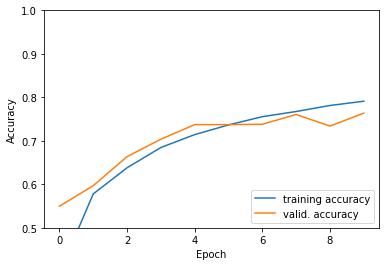

In [43]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [58]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 100s 79ms/step - loss: 1.7300 - accuracy: 0.3546 - val_loss: 1.3815 - val_accuracy: 0.5276
Epoch 2/10
1250/1250 [==============================] - 101s 80ms/step - loss: 1.2728 - accuracy: 0.5421 - val_loss: 1.1580 - val_accuracy: 0.6112
Epoch 3/10
1250/1250 [==============================] - 101s 81ms/step - loss: 1.0841 - accuracy: 0.6170 - val_loss: 1.0046 - val_accuracy: 0.6748
Epoch 4/10
1250/1250 [==============================] - 100s 80ms/step - loss: 0.9614 - accuracy: 0.6620 - val_loss: 0.9305 - val_accuracy: 0.6902
Epoch 5/10
1250/1250 [==============================] - 102s 81ms/step - loss: 0.8834 - accuracy: 0.6900 - val_loss: 0.8437 - val_accuracy: 0.7209
Epoch 6/10
1250/1250 [==============================] - 101s 81ms/step - loss: 0.8285 - accuracy: 0.7085 - val_loss: 0.8447 - val_accuracy: 0.7181
Epoch 7/10
1250/1250 [==============================] - 101s 81ms/step - loss: 0.7820 - accuracy: 0.7282 - val_loss: 0

313/313 - 4s - loss: 0.7014 - accuracy: 0.7638 - 4s/epoch - 13ms/step
valid_accuracy=0.7638000249862671, valid_loss=0.7013581991195679


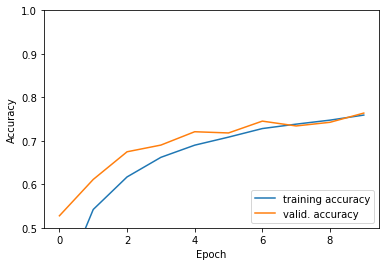

In [59]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### The overfitting problem has soloved, but need to improve the accuracy.

## batch normalization

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [49]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [50]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 122s 97ms/step - loss: 1.4075 - accuracy: 0.5040 - val_loss: 1.0606 - val_accuracy: 0.6323
Epoch 2/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.9396 - accuracy: 0.6690 - val_loss: 1.1098 - val_accuracy: 0.6233
Epoch 3/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.7933 - accuracy: 0.7250 - val_loss: 1.1787 - val_accuracy: 0.6421
Epoch 4/10
1250/1250 [==============================] - 123s 98ms/step - loss: 0.6949 - accuracy: 0.7595 - val_loss: 0.9081 - val_accuracy: 0.6967
Epoch 5/10
1250/1250 [==============================] - 122s 98ms/step - loss: 0.6400 - accuracy: 0.7787 - val_loss: 0.6192 - val_accuracy: 0.7971
Epoch 6/10
1250/1250 [==============================] - 121s 97ms/step - loss: 0.5651 - accuracy: 0.8046 - val_loss: 0.6488 - val_accuracy: 0.7794
Epoch 7/10
1250/1250 [==============================] - 123s 98ms/step - loss: 0.5199 - accuracy: 0.8196 - val_loss: 0

313/313 - 6s - loss: 0.8175 - accuracy: 0.7724 - 6s/epoch - 21ms/step
valid_accuracy=0.7724000215530396, valid_loss=0.8175137042999268


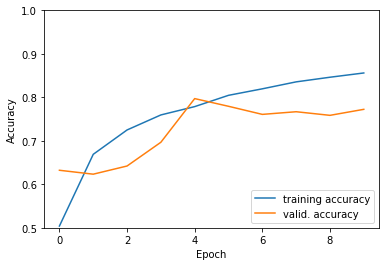

In [51]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [52]:
history = model.fit(train_images, train_labels, epochs=35, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/35
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3862 - accuracy: 0.8670 - val_loss: 0.7339 - val_accuracy: 0.7952
Epoch 2/35
1250/1250 [==============================] - 123s 99ms/step - loss: 0.3617 - accuracy: 0.8745 - val_loss: 0.6842 - val_accuracy: 0.7913
Epoch 3/35
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3396 - accuracy: 0.8824 - val_loss: 0.8456 - val_accuracy: 0.7671
Epoch 4/35
1250/1250 [==============================] - 123s 99ms/step - loss: 0.3277 - accuracy: 0.8862 - val_loss: 0.9279 - val_accuracy: 0.7938
Epoch 5/35
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3005 - accuracy: 0.8969 - val_loss: 0.8486 - val_accuracy: 0.8135
Epoch 6/35
1250/1250 [==============================] - 123s 99ms/step - loss: 0.2872 - accuracy: 0.8995 - val_loss: 1.0067 - val_accuracy: 0.8063
Epoch 7/35
1250/1250 [==============================] - 163s 131ms/step - loss: 0.2823 - accuracy: 0.9016 - val_loss: 

313/313 - 10s - loss: 0.5703 - accuracy: 0.8406 - 10s/epoch - 34ms/step
valid_accuracy=0.8406000137329102, valid_loss=0.5703471899032593


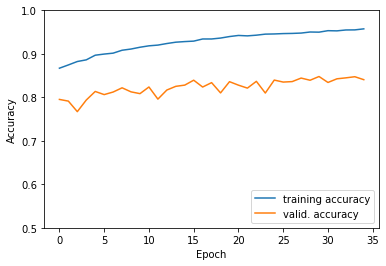

In [53]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### There is still an overfitting problem. I will try to find a better dropout layer parameters.

### Final model

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=35, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/35
1250/1250 [==============================] - 137s 109ms/step - loss: 1.5798 - accuracy: 0.4531 - val_loss: 1.5262 - val_accuracy: 0.4744
Epoch 2/35
1250/1250 [==============================] - 133s 107ms/step - loss: 1.0303 - accuracy: 0.6385 - val_loss: 0.8991 - val_accuracy: 0.6884
Epoch 3/35
1250/1250 [==============================] - 132s 106ms/step - loss: 0.8647 - accuracy: 0.7017 - val_loss: 1.1616 - val_accuracy: 0.5998
Epoch 4/35
1250/1250 [==============================] - 132s 106ms/step - loss: 0.7725 - accuracy: 0.7353 - val_loss: 0.7666 - val_accuracy: 0.7508
Epoch 5/35
1250/1250 [==============================] - 132s 106ms/step - loss: 0.7034 - accuracy: 0.7620 - val_loss: 0.7027 - val_accuracy: 0.7614
Epoch 6/35
1250/1250 [==============================] - 127s 102ms/step - loss: 0.6456 - accuracy: 0.7788 - val_loss: 0.6689 - val_accuracy: 0.7740
Epoch 7/35
1250/1250 [==============================] - 133s 106ms/step - loss: 0.6078 - accuracy: 0.7934 - val_

313/313 - 14s - loss: 0.4661 - accuracy: 0.8554 - 14s/epoch - 45ms/step
valid_accuracy=0.855400025844574, valid_loss=0.4661211371421814


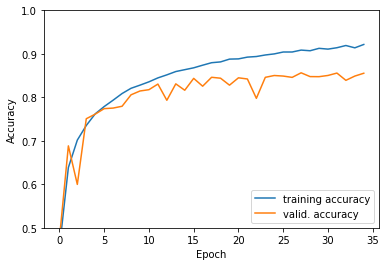

In [16]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [75]:
predition(model, test_images)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,1,0.085544,0.085536,0.085565,0.228809,0.085541,0.086685,0.085694,0.085536,0.085555,0.085536
1,2,0.085346,0.085371,0.085342,0.085342,0.085342,0.085342,0.085342,0.085342,0.231891,0.085342
2,3,0.086355,0.092304,0.086183,0.086177,0.086178,0.086178,0.086185,0.086177,0.218002,0.086260
3,4,0.140150,0.088546,0.088545,0.088562,0.088515,0.088514,0.088514,0.088514,0.151441,0.088698
4,5,0.085406,0.085408,0.085768,0.085462,0.085453,0.085406,0.230881,0.085405,0.085406,0.085406


## data augmentation

In [8]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [10]:
model = models.Sequential()
# Add the preprocessing layers you created earlier.
model.add(resize_and_rescale)
model.add(data_augmentation)

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='Adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
                  #loss='sparse_categorical_crossentropy', # For TF1
                  metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 2298s 2s/step - loss: 1.8575 - accuracy: 0.3333 - val_loss: 58.2009 - val_accuracy: 0.2071
Epoch 2/10
 584/1250 [=============>................] - ETA: 19:13 - loss: 1.6643 - accuracy: 0.3998

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))